# Surrogate Plots


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
#from sensible_raw.loaders import loader
from world_viewer.synthetic_world import SyntheticWorld
from world_viewer.glasses import Glasses
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from matplotlib.colors import LogNorm
from sklearn.utils import shuffle
from matplotlib.figure import figaspect

In [2]:
# set analysis params
analysis = 'expo_nmb'
opinion_type = "op_synthetic"
binning = True
n_bins = 15
save_plots = False
show_plot = True

phi = 0.0
steps = 89
run = 1

In [3]:
# load copenhagen data for comparison plots
syn_rw = SyntheticWorld(path="data/Synthetisch/avm_final_5k", run=run, number_of_nodes=851)
syn_rw.load_world(phi = phi, cc = False, n_op = 2, steps=steps, read_cached = False, tc=True)
syn_glasses_rw = Glasses(syn_rw)
syn_data_rw = pd.read_pickle("tmp/final/spring_data_phi"+str(phi)+".pkl")

Load World: SYN_phi=0.0_CC=False_N=2_TC=True_run=1 from adaptive_voter_model_phi0.0_nopinions2_steps89_run1_tc
Numer of time steps is: 90
read edges
read traits


In [15]:
# load surrogates 
# this data was calculated by the notebook 
# - AVM_make_surrogate_drfs_1+2+5.py
# - AVM_make_surrogate_drfs_3.py
# - AVM_make_surrogate_drfs_4.py
# - AVM_make_surrogate_drfs_6.py


surrogate1 = pd.read_pickle("tmp/final/surrogate1.pkl") #base
surrogate2 = pd.read_pickle("tmp/final/surrogate2.pkl") #individual activitiy level
surrogate3 = pd.read_pickle("tmp/final/surrogate3.pkl") #non-contagion + individual persistency
surrogate4 = pd.read_pickle("tmp/final/surrogate4.pkl") #group dynamics
surrogate5 = pd.read_pickle("tmp/final/surrogate5.pkl") #network structure
surrogate6 = pd.read_pickle("tmp/final/surrogate6.pkl") #homophily

x_max = 40
surrogate1 = surrogate1[surrogate1.exposure <= x_max]
surrogate2 = surrogate2[surrogate2.exposure <= x_max]
surrogate3 = surrogate3[surrogate3.exposure <= x_max]
surrogate4 = surrogate4[surrogate4.exposure <= x_max]
surrogate5 = surrogate5[surrogate5.exposure <= x_max]
surrogate6 = surrogate6[surrogate6.exposure <= x_max]

<IPython.core.display.Javascript object>


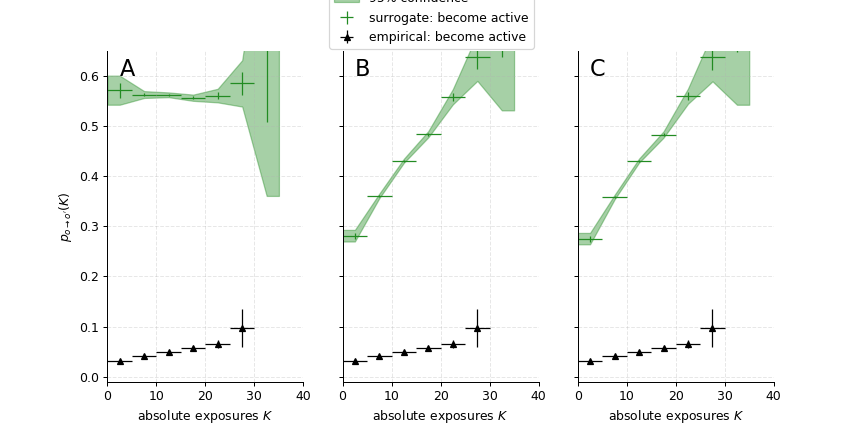

In [16]:
# plot trait surrogates (fig: 4 in the paper draft)
w, h = figaspect(0.5)
fig, ax = plt.subplots(1,3, figsize=(w,h))
syn_glasses_rw.output_folder = "final/"
q_binning=False
bin_width=5
n_bins=15
y_upper_lim = 0.65

syn_glasses_rw.plot_opinion_change_per_exposure_number(surrogate1[surrogate1.op_synthetic == True], "expo_nmb", binning, n_bins=n_bins, bin_width=bin_width, \
            save_plots=False, show_plot=show_plot, y_lower_lim=0, y_upper_lim = y_upper_lim, label="surrogate: become active", \
            q_binning = q_binning, loglog=False, step_plot=True, color="forestgreen", x_lim=x_max, ci=True, fig=fig, ax=ax[0])
syn_glasses_rw.plot_opinion_change_per_exposure_number(surrogate2[surrogate2.op_synthetic == True], "expo_nmb", binning, n_bins=n_bins, bin_width=bin_width, \
            save_plots=False, show_plot=show_plot, y_lower_lim=0, y_upper_lim = y_upper_lim, label="surrogate: become active", \
            q_binning = q_binning, loglog=False, step_plot=True, color="forestgreen", x_lim=x_max, ci=True, fig=fig, ax=ax[1], legend=False)
syn_glasses_rw.plot_opinion_change_per_exposure_number(surrogate3[surrogate3.op_synthetic == True], "expo_nmb", binning, n_bins=n_bins, bin_width=bin_width, \
            save_plots=False, show_plot=show_plot, y_lower_lim=0, y_upper_lim = y_upper_lim, label="surrogate: become active", \
            q_binning = q_binning, loglog=False, step_plot=True, color="forestgreen", x_lim=x_max, ci=True, fig=fig, ax=ax[2], legend=False)

syn_glasses_rw.plot_opinion_change_per_exposure_number(syn_data_rw[syn_data_rw.op_synthetic == True], "expo_nmb", binning, n_bins=n_bins, bin_width=bin_width, \
          save_plots=False, show_plot=show_plot, y_lower_lim=-0.01, y_upper_lim = y_upper_lim, label=r"synthetic: become active", \
           q_binning = q_binning, loglog=False, step_plot=True, color="black", x_lim=x_max,fig=fig, ax=ax[0], marker="^", markersize=5)
syn_glasses_rw.plot_opinion_change_per_exposure_number(syn_data_rw[syn_data_rw.op_synthetic == True], "expo_nmb", binning, n_bins=n_bins, bin_width=bin_width, \
          save_plots=False, show_plot=show_plot, y_lower_lim=-0.01, y_upper_lim = y_upper_lim, label=r"synthetic: become active", \
           q_binning = q_binning, loglog=False, step_plot=True, color="black", x_lim=x_max,fig=fig, ax=ax[1], marker="^", markersize=5, legend=False)
syn_glasses_rw.plot_opinion_change_per_exposure_number(syn_data_rw[syn_data_rw.op_synthetic == True], "expo_nmb", binning, n_bins=n_bins, bin_width=bin_width, \
          save_plots=False, show_plot=show_plot, y_lower_lim=-0.01, y_upper_lim = y_upper_lim, label=r"synthetic: become active", \
           q_binning = q_binning, loglog=False, step_plot=True, color="black", x_lim=x_max,fig=fig, ax=ax[2], marker="^", markersize=5, legend=False)
ax[0].legend(bbox_to_anchor=(1.1, 1.21))

ax[0].set_title("A", y = 0.9, x = 0.1, fontsize=18)
ax[1].set_title("B", y = 0.9, x = 0.1, fontsize=18)
ax[2].set_title("C", y = 0.9, x = 0.1, fontsize=18)


fig.savefig("tmp/final/trait_surrogates_phi"+str(phi)+".pdf" , bbox_inches='tight')

<IPython.core.display.Javascript object>


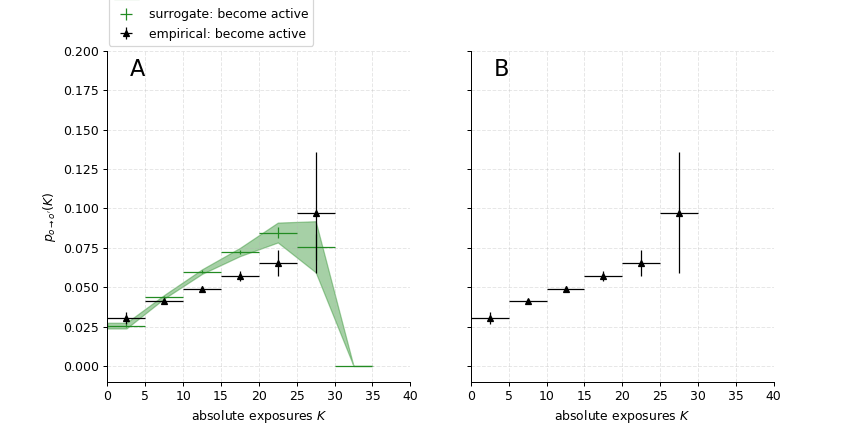

In [19]:
# plot edge surrogates (fig: 5 in the paper draft)

w, h = figaspect(0.5)
fig, ax = plt.subplots(1,2, figsize=(w,h))
syn_glasses_rw.output_folder = "final/"
q_binning=False
bin_width=5
n_bins=15
y_upper_lim = 0.2

syn_glasses_rw.plot_opinion_change_per_exposure_number(surrogate5[surrogate5.op_synthetic == True], "expo_nmb", binning, n_bins=n_bins, bin_width=bin_width, \
            save_plots=False, show_plot=show_plot, y_lower_lim=0, y_upper_lim = y_upper_lim, label="surrogate: become active", \
            q_binning = q_binning, loglog=False, step_plot=True, color="forestgreen", x_lim=x_max, ci=True, fig=fig, ax=ax[0])
#syn_glasses_rw.plot_opinion_change_per_exposure_number(surrogate6[surrogate6.dop_synthetic == True], "expo_nmb", binning, n_bins=n_bins, bin_width=bin_width, \
#            save_plots=False, show_plot=show_plot, y_lower_lim=0, y_upper_lim = y_upper_lim, label="surrogate: become active", \
#            q_binning = q_binning, loglog=False, step_plot=True, color="forestgreen", x_lim=x_max, ci=True, fig=fig, ax=ax[1], legend=False)

syn_glasses_rw.plot_opinion_change_per_exposure_number(syn_data_rw[syn_data_rw.op_synthetic == True], "expo_nmb", binning, n_bins=n_bins, bin_width=bin_width, \
          save_plots=False, show_plot=show_plot, y_lower_lim=-0.01, y_upper_lim = y_upper_lim, label=r"empirical: become active", \
           q_binning = q_binning, loglog=False, step_plot=True, color="black", x_lim=x_max,fig=fig, ax=ax[0], marker="^", markersize=5)
syn_glasses_rw.plot_opinion_change_per_exposure_number(syn_data_rw[syn_data_rw.op_synthetic == True], "expo_nmb", binning, n_bins=n_bins, bin_width=bin_width, \
          save_plots=False, show_plot=show_plot, y_lower_lim=-0.01, y_upper_lim = y_upper_lim, label=r"empirical: become active", \
           q_binning = q_binning, loglog=False, step_plot=True, color="black", x_lim=x_max,fig=fig, ax=ax[1], marker="^", markersize=5, legend=False)

ax[0].legend(bbox_to_anchor=(0.7, 1.22))
ax[0].set_title("A", y = 0.9, x = 0.1, fontsize=18)
ax[1].set_title("B", y = 0.9, x = 0.1, fontsize=18)
fig.savefig("tmp/final/edge_surrogates"+str(phi)+".pdf" , bbox_inches='tight')

<IPython.core.display.Javascript object>


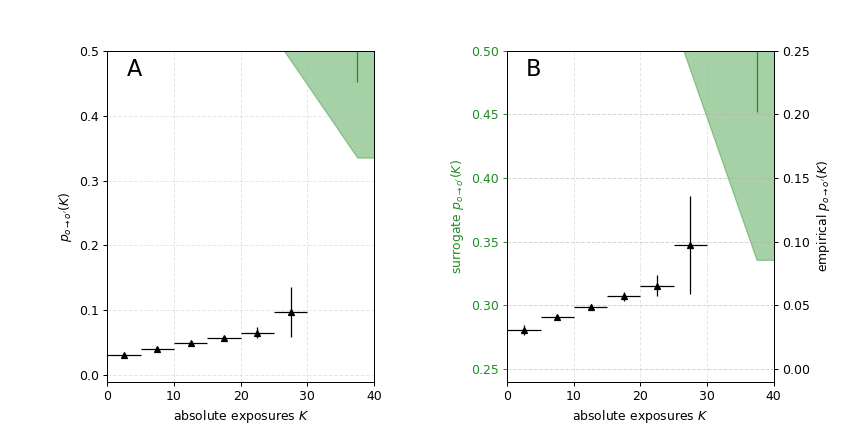

In [17]:
# plot trait surrogate (fig: 6 in the paper draft)

w, h = figaspect(0.5)
fig, ax = plt.subplots(1,2,figsize=(w,h))
bin_width=5
q_binning=False

syn_glasses_rw.plot_opinion_change_per_exposure_number(surrogate4[surrogate4.op_synthetic == True], "expo_nmb", binning, n_bins, \
            save_plots, show_plot, label="surrogate: become active", q_binning = False, loglog=False, step_plot=True, color="forestgreen",y_lower_lim=0.24,y_upper_lim=0.5, \
            min_bin_size = 30, bin_width=15, x_lim=330,fig=fig, ax=ax[0], ci=True, ylabel="", retdata=True, borders=True)
syn_glasses_rw.plot_opinion_change_per_exposure_number(syn_data_rw[syn_data_rw.op_synthetic == True], "expo_nmb", binning, n_bins=n_bins, bin_width=bin_width, \
            save_plots=False, show_plot=show_plot, y_lower_lim=-0.01, y_upper_lim = 0.5, label=r"empirical: become active", \
            q_binning = q_binning, loglog=False, step_plot=True, color="black", x_lim=x_max,fig=fig, ax=ax[0], marker="^",lable_outer=False, ylabel="", markersize=5, borders=True, retdata=True)



ax3 = ax[1].twinx()  # instantiate a second axes that shares the same x-axis



syn_glasses_rw.plot_opinion_change_per_exposure_number(surrogate4[surrogate4.op_synthetic == True], "expo_nmb", binning, n_bins, \
            save_plots, show_plot, label="surrogate: become active", q_binning = False, loglog=False, step_plot=True, color="forestgreen",y_lower_lim=0.24,y_upper_lim=0.5, \
            min_bin_size = 30, bin_width=15, x_lim=330,fig=fig, ax=ax[1], ci=True, ylabel="surrogate ", retdata=True,lable_outer=False, legend=False)
syn_glasses_rw.plot_opinion_change_per_exposure_number(syn_data_rw[syn_data_rw.op_synthetic == True], "expo_nmb", binning, n_bins=n_bins, bin_width=bin_width, \
            save_plots=False, show_plot=show_plot, y_lower_lim=-0.01, y_upper_lim = 0.25, label=r"empirical: become active", \
            q_binning = q_binning, loglog=False, step_plot=True, color="black", x_lim=x_max,fig=fig, ax=ax3, marker="^",lable_outer=False, ylabel="empirical ", \
                                                       markersize=5, borders=True, retdata=True, legend = False)

ax[0].legend(bbox_to_anchor=(0.7,1.25))
fig.subplots_adjust(wspace=0.5)
ax[1].tick_params(axis='y', colors='forestgreen')#
ax[1].yaxis.label.set_color('forestgreen')
ax[0].set_title("A", y = 0.9, x = 0.1, fontsize=18)
ax[1].set_title("B", y = 0.9, x = 0.1, fontsize=18)
fig.savefig("tmp/final/trait_surrogate_groudyn_phi"+str(phi)+".pdf" , bbox_inches='tight')